# Collectibles and triggers dev

In [1]:
# Base Data Science snippet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm_notebook

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../../")
import westworld

In [8]:
from westworld.examples.collectibles_simple import simulation

# Test

In [26]:
"""Simulation where agent become red if in range of other agents
It highlight the vision range feature useful to search collectibles, simulate vision, or contagion in epidemic models
"""
import sys
sys.path.append("../")

from westworld.environment.grid import GridEnvironment
from westworld.agents.grid import BaseAgent
from westworld.simulation.simulation import Simulation
from westworld.colors import *


# Setup classes
class Agent(BaseAgent):
    
    show_vision_range = True
    
    def step(self):
        self.wander()
        
        collisions = self.find_in_range()
        if len(collisions) > 0:
            self.color = RED
        else:
            self.color = GREEN
            


agent_spawner = lambda x,y : Agent(x,y,color = GREEN,curiosity = 10,vision_range = 3)

# Setup grid
BOX_SIZE = 20
WIDTH = 50
HEIGHT = 30
env = GridEnvironment(WIDTH,HEIGHT,BOX_SIZE)
env.spawn(agent_spawner,20)
env.render()


# Setup simulation
sim = Simulation(env,fps = 10,name = "EpidemicVisionRange")
sim.run_episode(n_steps = 100,save = True)


[INFO] Saving gif at ./captures/EpidemicVisionRange_1590074454.gif



In [24]:
env.quit()

In [13]:
env.quit()

# First collectible env

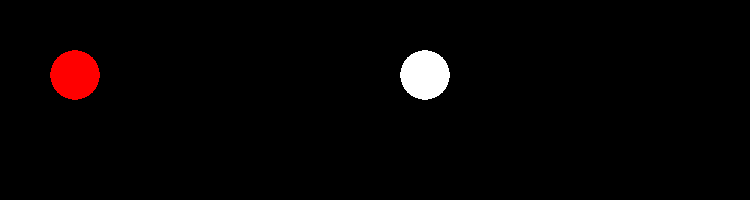

In [56]:
from westworld.environment.grid import GridEnvironment
from westworld.agents.grid import BaseAgent,BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation.simulation import Simulation
from westworld.colors import *

BOX_SIZE = 50

class Agent(BaseAgent):
    
    def init(self):
        self.coll = 0
    
    def step(self):
        self.move(dx = 1)
        
class Collectible(BaseCollectible):
    
    def on_collision(self,objects):
        obj = self.env[objects[0]]
        obj.coll += 1
        
        
        

agents = [Agent(1,1,1,1,color = RED,circle = True)]
triggers = [Collectible(8,1,1,1,color = WHITE,circle = True)]


# Setup grid
env = GridEnvironment(BOX_SIZE,15,4,objects = agents + triggers)
env.render()
env.get_img()

In [79]:
%%time
env.get_random_available_pos()

Wall time: 0 ns


(1, 11)

In [42]:
sim = Simulation(env)

In [43]:
sim.run_episode(10,save = "toy_pathfinding.gif",replay = True,fps_replay=10)

[INFO] Saving gif at ./captures/toy_pathfinding.gif



interactive(children=(Play(value=0, description='Press play', max=10), Output()), _dom_classes=('widget-intera…

IntSlider(value=0, max=10)

# More complicated collectible environment

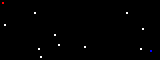

In [111]:
from westworld.environment.grid import GridEnvironment
from westworld.agents.grid import BaseAgent,BaseObstacle,BaseTrigger,BaseCollectible
from westworld.simulation.simulation import Simulation
from westworld.colors import *

BOX_SIZE = 10

class Agent(BaseAgent):
    
    def init(self):
        self.coll = 0
        self.target = None
    
    def step(self):
        
        # Safety check
        if self.target is not None:
            if self.target not in self.env._objects:
                self.target = None

        # Find next target
        if self.target is None:
            _,ids = self.find_closest(k = 1,condition = {"collectible":True})
            if len(ids) == 0:
                self.env.finish_episode()
            else:
                stop = False
                self.target = ids[0]
        
        if not self.env.done:
            self.move_towards(obj = self.target,n = 10)
        
        
class Collectible(BaseCollectible):
    
    collectible = True
    
    def on_collision(self,objects):
        obj = self.env[objects[0]]
        obj.coll += 1
        obj.target = None
        
        
        

agent = Agent(1,1,color = RED)
agent2 = Agent(75,25,color = BLUE)


collectible_spawner = lambda x,y : Collectible(x,y,color = WHITE)


# Setup grid
env = GridEnvironment(80,30,BOX_SIZE,objects = [agent,agent2])
env.spawn(collectible_spawner,10)
env.render()
env.get_img()

In [114]:
from examples.collectibles_multiplayer import run

In [116]:
run.quit()

AttributeError: 'Command' object has no attribute 'quit'

In [115]:
run()

Usage: ipykernel_launcher.py [OPTIONS]
Try "ipykernel_launcher.py --help" for help.

Error: no such option: -f


SystemExit: 2

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3327: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [112]:
sim = Simulation(env,fps = 30)
sim.run_episode(1000,save = True,replay = True,fps_replay=20)
env.quit()

[INFO] Saving gif at ./captures/Simulation_1590071380.gif



interactive(children=(Play(value=0, description='Press play', interval=50, max=79), Output()), _dom_classes=('…

IntSlider(value=0, max=79)